In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import glob as gb
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout,GlobalAveragePooling2D
from sklearn.metrics import confusion_matrix, f1_score, classification_report, accuracy_score
import os

In [26]:
train_data = '/kaggle/input/yawn-eye-dataset-new/dataset_new/train/'
test_data = '/kaggle/input/yawn-eye-dataset-new/dataset_new/test/'

In [27]:
for folder in  os.listdir(train_data): 
    files = gb.glob(pathname= str( train_data + folder + '/*.jpg'))
    print(f'For data , found {len(files)} in folder {folder}')

For data , found 617 in folder Closed
For data , found 617 in folder Open
For data , found 617 in folder yawn
For data , found 616 in folder no_yawn


In [28]:
features = {'Closed':0, 'Open':1}
def getcode(n) : 
    for one , two in features.items() : 
        if n == two : 
            return one

In [29]:
size = []
for folder in os.listdir(train_data) :
    if folder == 'Closed' or folder == 'Open':
        files = gb.glob(pathname= str( train_data + folder + '/*.jpg'))
        for file in files: 
            image = plt.imread(file)
            size.append(image.shape)
    else:
        break
pd.Series(size).value_counts

<bound method IndexOpsMixin.value_counts of 0       (223, 223, 3)
1       (109, 110, 3)
2       (300, 266, 3)
3       (232, 273, 3)
4        (91, 115, 3)
            ...      
1229    (539, 529, 3)
1230    (321, 300, 3)
1231      (64, 74, 3)
1232    (427, 311, 3)
1233    (102, 113, 3)
Length: 1234, dtype: object>

In [30]:
pic_size = 140
Train_x = []
Train_y = []
for folder in  os.listdir(train_data) : 
    if folder == 'Closed' or folder == 'Open':
        files = gb.glob(pathname= str( train_data + folder + '/*.jpg'))
        for file in files: 
            image = cv2.imread(file)
            image_array = cv2.resize(image,(pic_size,pic_size))
            Train_x.append(list(image_array))
            Train_y.append(features[folder])
    else:
        break

In [31]:
print(f'we have {len(Train_x)} items in Train_x')
print(f'we have {len(Train_y)} items in Train_y')

we have 1234 items in Train_x
we have 1234 items in Train_y


In [32]:
X_test = []
y_test = []
for folder in  os.listdir(test_data) : 
    if folder == 'Closed' or folder == 'Open':
        files = gb.glob(pathname= str( test_data + folder + '/*.jpg'))
        for file in files: 
            image = cv2.imread(file)
            image_array = cv2.resize(image , (pic_size,pic_size))
            X_test.append(list(image_array))
            y_test.append(features[folder])
    else:
        break

In [33]:
print(f'we have {len(X_test)} items in X_Test')
print(f'we have {len(y_test)} items in Y_Test')

we have 218 items in X_Test
we have 218 items in Y_Test


In [ ]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(Train_x),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(Train_x[i])   
    plt.axis('off')
    plt.title(getcode(Train_y[i]))

In [ ]:
Train_x, X_val, Train_y, y_val = train_test_split(Train_x, Train_y, train_size=0.8, shuffle=True, random_state=0)

Train_x = np.array(Train_x)
Train_y = np.array(Train_y)

X_val = np.array(X_val)
y_val = np.array(y_val)

temp2 = list(zip(X_test, y_test))
random.shuffle(temp2)
X_test, y_test = zip(*temp2)
X_test, y_test = np.array(X_test), np.array(y_test)

In [ ]:
model = Sequential([
        Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(pic_size,pic_size,3)),
        Conv2D(32,kernel_size=(3,3),activation='relu'),
        MaxPooling2D(2,2),
        Conv2D(64,kernel_size=(5,5),activation='relu'),    
        Conv2D(64,kernel_size=(5,5),activation='relu'),
        MaxPooling2D(2,2),
        Conv2D(128,kernel_size=(5,5),activation='relu'),
        Conv2D(128,kernel_size=(5,5),activation='relu'),
        MaxPooling2D(2,2),
        Conv2D(256,kernel_size=(3,3),activation='relu'),
        Conv2D(256,kernel_size=(3,3),activation='relu'),
        Flatten() ,    
        Dense(512,activation='relu') ,    
        Dense(512,activation='relu') ,
        Dense(256,activation='relu') ,
        Dense(256,activation='relu') ,
        Dense(128,activation='relu') ,
        Dense(1,activation='sigmoid') ,    
        ])

In [ ]:
optimizer= tf.keras.optimizers.Adam(learning_rate=0.00008)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

In [ ]:
data_generator = ImageDataGenerator(horizontal_flip=True, rotation_range=10, zoom_range=0.2, 
                             brightness_range=(0.1, 0.8))

In [40]:
epochs = 10
Model = model.fit(data_generator.flow(Train_x,Train_y, batch_size=32), epochs=epochs,
                                     validation_data=(X_val,y_val), validation_steps=1, verbose=1)

Epoch 1/10
31/31 [==============================] - 10s 181ms/step - loss: 0.4385 - accuracy: 0.8004 - val_loss: 0.2169 - val_accuracy: 0.9271
Epoch 2/10
31/31 [==============================] - 5s 173ms/step - loss: 0.2080 - accuracy: 0.9210 - val_loss: 0.1978 - val_accuracy: 0.9433
Epoch 3/10
31/31 [==============================] - 5s 172ms/step - loss: 0.1703 - accuracy: 0.9453 - val_loss: 0.1651 - val_accuracy: 0.9595
Epoch 4/10
31/31 [==============================] - 5s 174ms/step - loss: 0.1099 - accuracy: 0.9676 - val_loss: 0.1046 - val_accuracy: 0.9636
Epoch 5/10
31/31 [==============================] - 5s 170ms/step - loss: 0.1453 - accuracy: 0.9524 - val_loss: 0.1315 - val_accuracy: 0.9676
Epoch 6/10
31/31 [==============================] - 5s 168ms/step - loss: 0.0968 - accuracy: 0.9656 - val_loss: 0.1861 - val_accuracy: 0.9636
Epoch 7/10
31/31 [==============================] - 5s 172ms/step - loss: 0.1053 - accuracy: 0.9595 - val_loss: 0.1053 - val_accuracy: 0.9717
Epoch

In [41]:
Loss,Accuracy = model.evaluate(X_test, y_test,batch_size=32)

print('Test Loss is {}'.format(Loss))
print('Test Accuracy is {}'.format(Accuracy ))

7/7 [==============================] - 0s 16ms/step - loss: 0.2108 - accuracy: 0.9633
Test Loss is 0.21075911819934845
Test Accuracy is 0.963302731513977


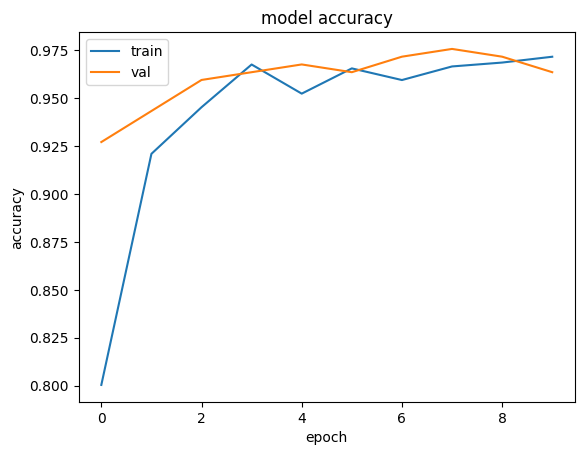

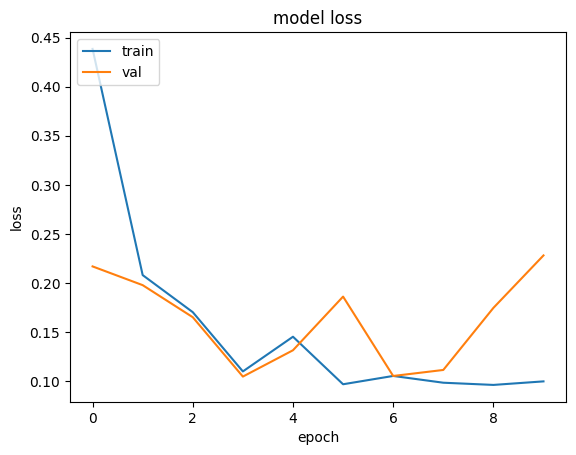

In [42]:

plt.plot(Model.history['accuracy'])
plt.plot(Model.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


plt.plot(Model.history['loss'])
plt.plot(Model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Predict testing data

In [43]:
y_pred = model.predict(X_test)
pred = [1 * (x[0]>=0.5) for x in y_pred]
print('Prediction Shape is {}'.format(y_pred.shape))

7/7 [==============================] - 0s 14ms/step
Prediction Shape is (218, 1)


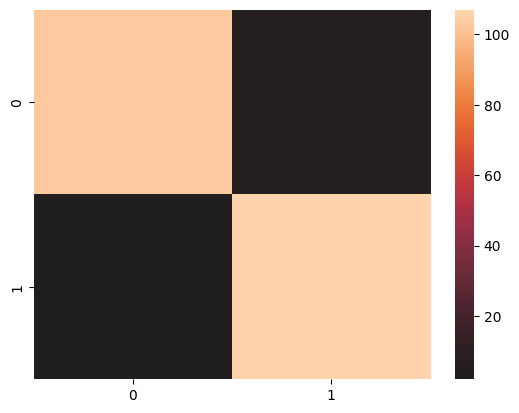

Confusion Matrix is
 [[103   6]
 [  2 107]]


In [44]:
CM = confusion_matrix(y_test, pred)

sns.heatmap(CM, center=True)
plt.show()

print('Confusion Matrix is\n', CM)


In [45]:
print(classification_report(y_test, pred))
print(accuracy_score(y_test, pred))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96       109
           1       0.95      0.98      0.96       109

    accuracy                           0.96       218
   macro avg       0.96      0.96      0.96       218
weighted avg       0.96      0.96      0.96       218

0.963302752293578


In [46]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_test),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_test[i])    
    plt.axis('off')
    plt.title(getcode(pred[i]))

In [47]:
model.save('cnnCat.h5')

In [48]:
"""
from tensorflow.keras.models import load_model
import cv2
import numpy as np

model = load_model('driver_state.h5')

test_image = cv2.imread('test_image.jpg') 
preprocessed_image = preprocess_image(test_image) 

input_image = np.expand_dims(preprocessed_image, axis=0)

segmentation_mask = model.predict(input_image)

segmented_image = np.argmax(segmentation_mask, axis=-1)[0]

cv2.imshow('Segmented Image', segmented_image)
cv2.waitKey(0)
cv2.destroyAllWindows()
"""

"\nfrom tensorflow.keras.models import load_model\nimport cv2\nimport numpy as np\n\nmodel = load_model('driver_state.h5')\n\ntest_image = cv2.imread('test_image.jpg') \npreprocessed_image = preprocess_image(test_image) \n\ninput_image = np.expand_dims(preprocessed_image, axis=0)\n\nsegmentation_mask = model.predict(input_image)\n\nsegmented_image = np.argmax(segmentation_mask, axis=-1)[0]\n\ncv2.imshow('Segmented Image', segmented_image)\ncv2.waitKey(0)\ncv2.destroyAllWindows()\n"